<a href="https://colab.research.google.com/github/RaisJaya/House-Price-Prediction-using-Linear-Regression/blob/main/House_Price_Prediction_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HOUSE PRICE PREDICTION USING LINEAR REGRESSION**

*Load Library*

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving DATA RUMAH.csv to DATA RUMAH.csv


In [3]:
df = pd.read_csv(io.BytesIO(data_to_load['DATA RUMAH.csv']))
print(df)

        NO                                         NAMA RUMAH        HARGA  \
0        1  Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...   3800000000   
1        2  Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...   4600000000   
2        3  Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...   3000000000   
3        4           Rumah Baru Tebet, Tebet, Jakarta Selatan    430000000   
4        5  Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...   9000000000   
...    ...                                                ...          ...   
1005  1006  Rumah Strategis Akses Jalan 2mobil Di Menteng ...   9000000000   
1006  1007             Tebet Rumah Siap Huni Jln 2 Mbl Nyaman   4000000000   
1007  1008        Di Kebun Baru Rumah Terawat, Area Strategis   4000000000   
1008  1009  Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...  19000000000   
1009  1010                Dijual Rumah Kokoh Di Gudang Peluru  10500000000   

       LB   LT  KT  KM  GRS  
0     220  220   3   3    0  
1  

In [4]:
df.shape

(1010, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.2+ KB


In [6]:
df.describe()

,NO,HARGA,LB,LT,KT,KM,GRS
count,1010.000000,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,505.500000,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,291.706188,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,1.000000,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,253.250000,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,505.500000,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,757.750000,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,1010.000000,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


In [7]:
df['KM'] = df['KM'].astype('int')
df['KT'] = df['KT'].astype('int')

*Handling Missing Values*

In [8]:
df.isnull().sum()

NO            0
NAMA RUMAH    0
HARGA         0
LB            0
LT            0
KT            0
KM            0
GRS           0
dtype: int64

*Exploratory Data Analysis*

In [9]:
df.head(15)

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
5,6,Rumah Mewah Modern Murah 3 lantai di Tebet Jak...,4970000000,300,154,5,3,3
6,7,"Rumah lama di Tebet, dekat MT Haryono dan tol ...",2600000000,120,150,3,2,1
7,8,RUMAH BAGUS KEREN JALAN LEBAR DI AREA & KAWASA...,10500000000,350,247,4,4,0
8,9,Minimalis Baru Jalan 1 Mobil Akses Mudah Dekat...,3250000000,125,90,3,3,0
9,10,"Minimalis Baru Jalan 2 Mobil Tebet Timur, Tebe...",4500000000,250,96,5,4,1


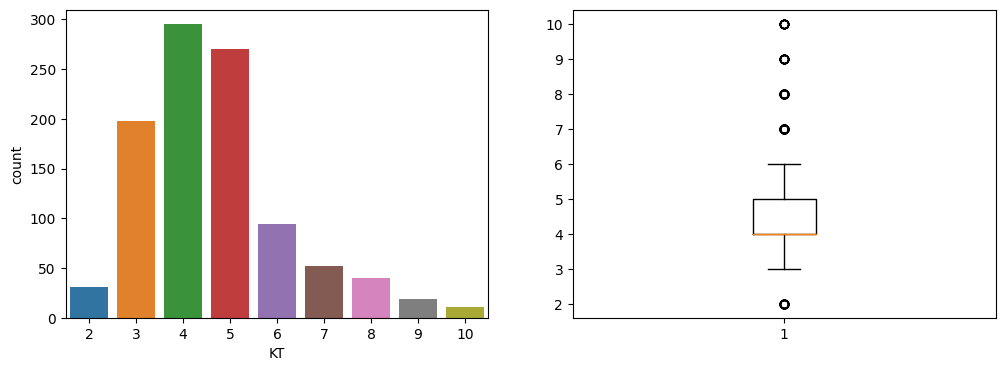

In [14]:
#Persebaran data jumlah Kamar Tidur
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x=df['KT'])

f.add_subplot (1,2,2)
plt.boxplot (df['KT'])
plt.show()

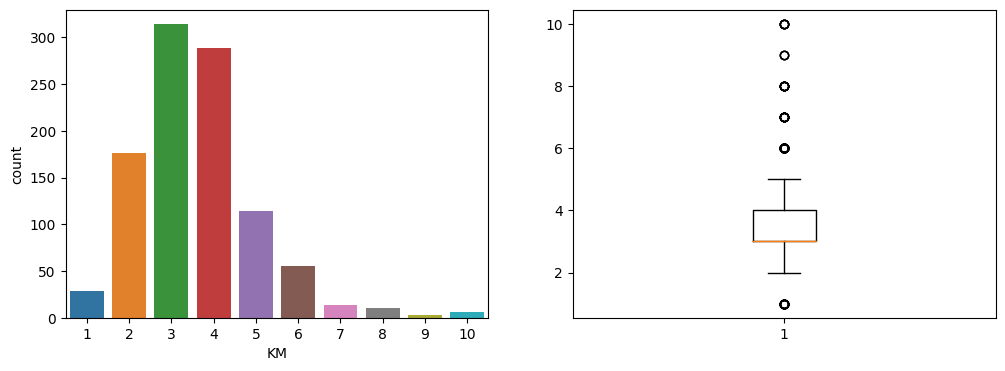

In [15]:
#Persebaran data jumlah Kamar Mandi
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x=df['KM'])

f.add_subplot (1,2,2)
plt.boxplot (df['KM'])
plt.show()

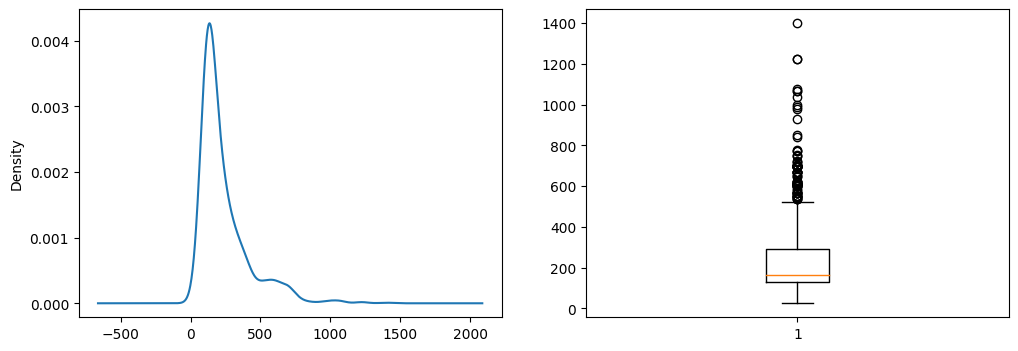

In [19]:
#Persebaran data Luas Tanah
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['LT'].plot(kind='kde')

f.add_subplot (1,2,2)
plt.boxplot (df['LT'])
plt.show()

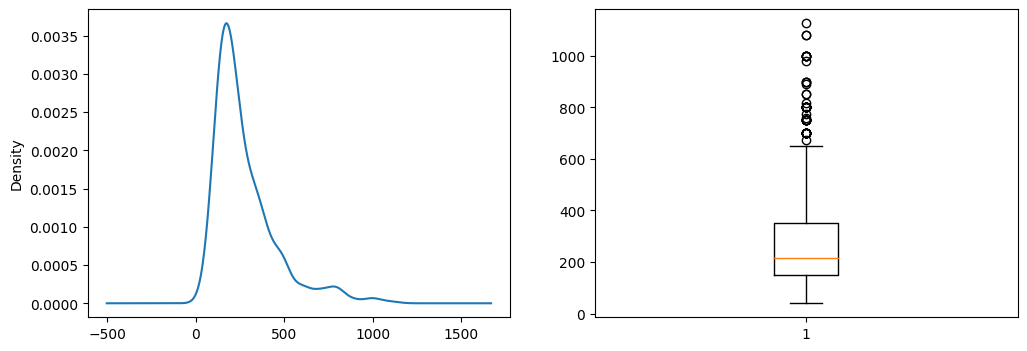

In [20]:
#Persebaran data Luas Bangunan
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['LB'].plot(kind='kde')

f.add_subplot (1,2,2)
plt.boxplot (df['LB'])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x400 with 0 Axes>

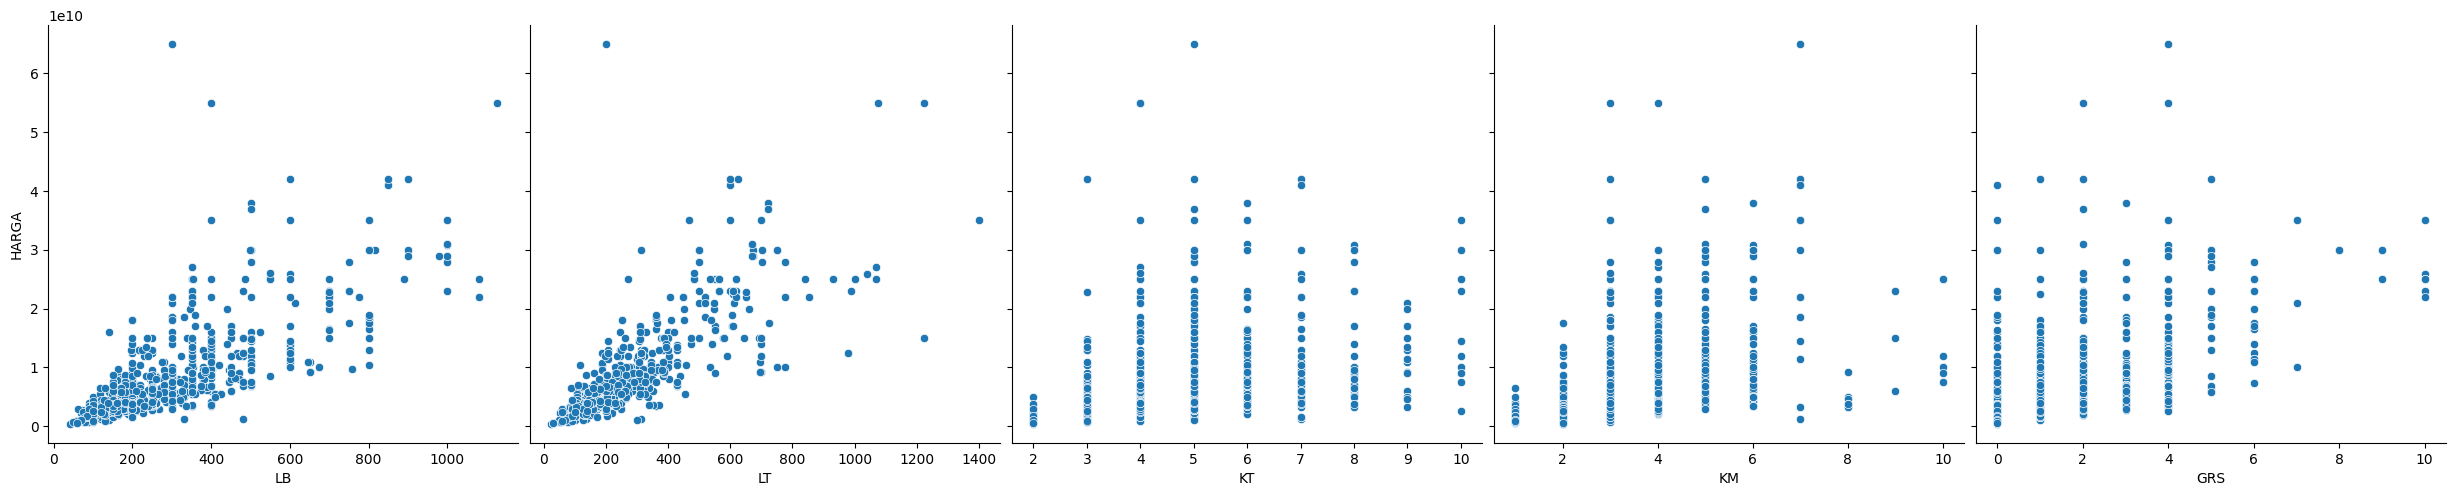

In [27]:
#Bivariate antara independent variabel dengan dependent variabel
plt.figure(figsize=(10,4))
sns.pairplot(data=df, x_vars=['LB','LT','KT','KM','GRS'], y_vars=['HARGA'], size=5)
plt.show()

In [28]:
#Nilai korelasi dari variabel independent dan variabel dependent
df.corr().style.background_gradient().set_precision(2)

<ipython-input-28-9e1bc000d672>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient().set_precision(2)
<ipython-input-28-9e1bc000d672>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient().set_precision(2)


,NO,HARGA,LB,LT,KT,KM,GRS
NO,1.00,0.01,0.02,0.01,-0.04,-0.03,0.04
HARGA,0.01,1.00,0.75,0.81,0.32,0.40,0.48
LB,0.02,0.75,1.00,0.74,0.44,0.53,0.49
LT,0.01,0.81,0.74,1.00,0.43,0.39,0.48
KT,-0.04,0.32,0.44,0.43,1.00,0.67,0.28
KM,-0.03,0.40,0.53,0.39,0.67,1.00,0.35
GRS,0.04,0.48,0.49,0.48,0.28,0.35,1.00


*Linear Regression Modelling*

In [29]:
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [51]:
x = df.drop(columns=['NO','HARGA', 'NAMA RUMAH'])
y = df['HARGA']

In [52]:
#Split Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(808, 5)
(808,)
(202, 5)
(202,)


In [54]:
lin_reg = LinearRegression()

In [55]:
lin_reg.fit(x_train, y_train)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 1.22852541e+07  2.32681420e+07 -6.38754626e+08  5.56618859e+08
  2.47983448e+08]
-775923911.9377832


In [56]:
coef_dict = {
    'features' : x.columns,
    'coef_value' : lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_values'])
coef

,features,coef_values
0,LB,NaN
1,LT,NaN
2,KT,NaN
3,KM,NaN
4,GRS,NaN


In [57]:
y_pred = lin_reg.predict(x_test)
lin_reg.score(x_test, y_test)

0.7713134894077545

In [58]:
lin_reg.predict([[220,260,5,3,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.94859923e+09])

In [ ]:
LB = int(input("Masukkan luas bangunan yang anda impikan : "))
LT = int(input("Masukan luas tanah yang anda inginkan : "))
KT = int(input("Masukkan jumlah kamar tidur yang anda inginkan : "))
KM = int(input("Masukkan jumlah kamar mandi yang anda inginkan : "))
GRS = int(input("Masukkan jumlah kendaraan yang akan digarasi : "))

price_prediction = lin_reg.predict([[LB, LT, KT, KM, GRS]])
print("Rumah impian anda, berkisar di harga Rp {}".format((price_prediction[0])))